NAME : MOHAMED ASIL
REG NO :212222230080

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:

X_train.shape


(60000, 28, 28)

In [ ]:
X_test.shape


(10000, 28, 28)

In [ ]:
single_image= X_train[0]


In [ ]:
single_image.shape


(28, 28)

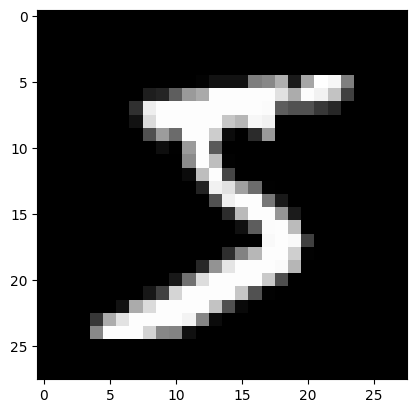

In [ ]:
plt.imshow(single_image,cmap='gray')


In [ ]:
y_train.shape


(60000,)

In [ ]:
X_train.min()


0

In [ ]:
X_train.max()


255

In [ ]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0


In [ ]:
X_train_scaled.min()


0.0

In [ ]:
X_train_scaled.max()


1.0

In [ ]:
y_train[0]


5

In [ ]:

y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)


In [ ]:
type(y_train_onehot)


numpy.ndarray

In [ ]:
y_train_onehot.shape


(60000, 10)

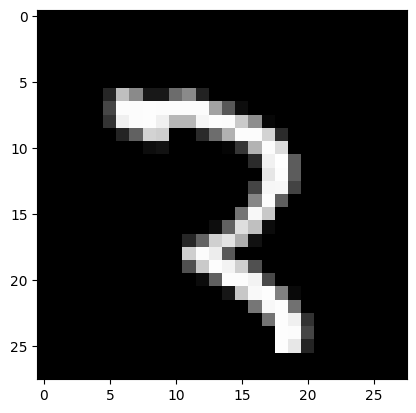

In [ ]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train_onehot[500]


array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:

X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [ ]:
name : MOHAMED ASIL .M
reg no : 212222230080

In [ ]:
model = keras.Sequential()


In [ ]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32, kernel_size=(7,7), input_shape=(28, 28, 1), activation='relu')),
model.add(layers.MaxPool2D(pool_size=(2, 2))),
model.add(layers.Conv2D(filters=20, kernel_size=(3,3), activation='relu')),
model.add(layers.MaxPool2D(pool_size=(2, 2))),
model.add(layers.Flatten()),
model.add(layers.Dense(64, activation='relu')),
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 22, 22, 32)        1600      
                                                                 
 max_pooling2d (MaxPooling2  (None, 11, 11, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 20)          5780      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 20)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 320)               0         
                                                                 
 dense (Dense)               (None, 64)               

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [ ]:

model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 42s 43ms/step - loss: 0.2351 - accuracy: 0.9302 - val_loss: 0.0722 - val_accuracy: 0.9785
Epoch 2/5
938/938 [==============================] - 40s 43ms/step - loss: 0.0714 - accuracy: 0.9783 - val_loss: 0.0594 - val_accuracy: 0.9815
Epoch 3/5
938/938 [==============================] - 40s 42ms/step - loss: 0.0512 - accuracy: 0.9844 - val_loss: 0.0364 - val_accuracy: 0.9887
Epoch 4/5
938/938 [==============================] - 41s 44ms/step - loss: 0.0409 - accuracy: 0.9871 - val_loss: 0.0355 - val_accuracy: 0.9887
Epoch 5/5
938/938 [==============================] - 39s 41ms/step - loss: 0.0351 - accuracy: 0.9892 - val_loss: 0.0358 - val_accuracy: 0.9888


In [ ]:
metrics = pd.DataFrame(model.history.history)


In [ ]:
metrics.head()


,loss,accuracy,val_loss,val_accuracy
0,0.235093,0.930200,0.072238,0.9785
1,0.071421,0.978317,0.059408,0.9815
2,0.051151,0.984450,0.036350,0.9887
3,0.040913,0.987133,0.035458,0.9887
4,0.035071,0.989183,0.035768,0.9888


<Axes: >

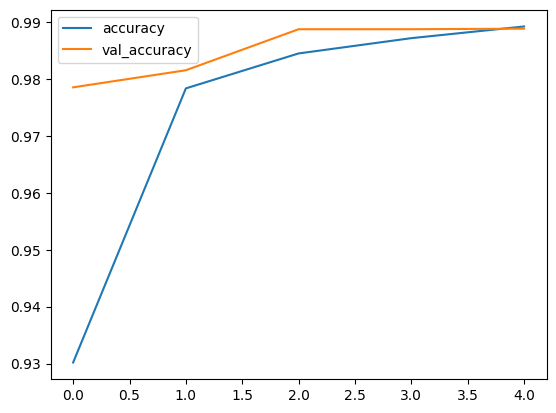

In [ ]:
metrics[['accuracy','val_accuracy']].plot()


<Axes: >

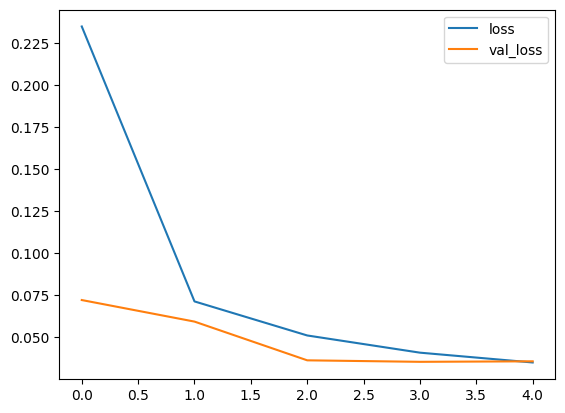

In [ ]:
metrics[['loss','val_loss']].plot()


In [ ]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)


313/313 [==============================] - 2s 6ms/step


In [ ]:
print(confusion_matrix(y_test,x_test_predictions))


[[ 975    0    0    0    0    0    2    1    2    0]
 [   0 1132    0    1    0    0    1    1    0    0]
 [   3    1 1021    2    0    0    0    5    0    0]
 [   0    0    3 1003    0    2    0    1    0    1]
 [   0    0    1    0  973    0    0    0    0    8]
 [   2    0    0    8    1  877    2    1    0    1]
 [   3    2    0    1    4    1  947    0    0    0]
 [   0    3    4    1    1    0    0 1013    1    5]
 [   4    0    3    2    3    2    2    2  943   13]
 [   2    0    0    0    3    0    0    0    0 1004]]


In [ ]:
print(classification_report(y_test,x_test_predictions))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.97      0.98       974
           9       0.97      1.00      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
img = image.load_img('/content/ex03 image.jpeg')


In [ ]:
type(img)


PIL.JpegImagePlugin.JpegImageFile

In [ ]:
img = image.load_img('/content/ex03 image.jpeg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 43ms/step


In [ ]:
print(x_single_prediction)


[8]


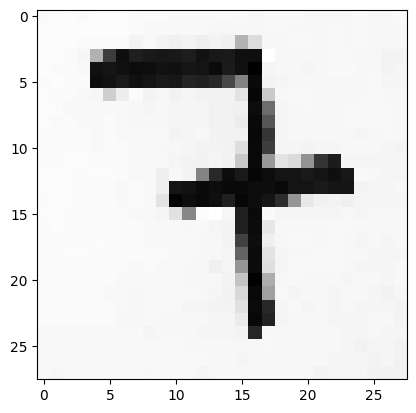

In [ ]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')



In [ ]:

img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)


1/1 [==============================] - 0s 26ms/step


In [ ]:
print(x_single_prediction)


[3]
